# VADER Sentiment analysis of Ghostrunner reviews on Opencritic

## Introduction:

In today's ever-evolving world of digital entertainment, the video game industry stands as a vibrant and dynamic landscape, captivating players with immersive experiences, rich narratives, and breathtaking graphics. One such game that has garnered substantial attention within the gaming community is "Ghostrunner." Released in [2020; One More Level], Ghostrunner blends elements of futuristic dystopia, parkour-style action, and cybernetic enhancements to deliver an adrenaline-pumping gaming adventure. As with any high-profile release, the reception of Ghostrunner has been a topic of fervent discussion among gamers and critics alike. Understanding the sentiment surrounding this game is not merely a matter of curiosity; it is a valuable exercise in gauging the success, appeal, and impact of modern video game titles. In this sentiment analysis, I delve into the world of Ghostrunner's reviews, employing advanced text analysis technique to uncover the collective sentiments expressed by players and reviewers.

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed for social media text. It is a popular and user-friendly approach for determining the sentiment of a piece of text, such as a tweet or a short social media post. VADER is widely used because of its ability to handle the nuances and complexities of sentiment analysis in informal and context-rich text.

VADER relies on a predefined lexicon (a list of words) that assigns sentiment scores to words. Each word in the lexicon is assigned a polarity score, indicating whether it is positive, negative, or neutral. Additionally, words are given intensity scores to account for the strength of the sentiment.

## Data:

The material for analysis was obtained using webscraping from the Opencritics (https://opencritic.com). 

## To do:
1. Reviews web-scrapping.
2. Compute sentiment polarity scores.
3. Check differences in intensivity (positive/negative polarity scores):\
**Are the reviews for Ghostrunner on Opencritic more positive or negative?**
4. Create a word map with the most frequently repeated words in reviews.

In [171]:
#loading packages
##webscrapping
import requests
from bs4 import BeautifulSoup
##nlp
from nltk.sentiment.vader import SentimentIntensityAnalyzer
###nltk.download() # be sure u have downloaded vader_lexicon from nltk_data
sia = SentimentIntensityAnalyzer()
from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud, STOPWORDS
##analysis and visualizations
import pandas as pd
from scipy import stats
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [172]:
user_agent = {'User-agent': 'Safari/18615.3.12.11.2'}
reviews_all = {'review':[]}
list_of_pages = [1,2,3,4,5,6]


for page in list_of_pages:
    url = f'https://opencritic.com/game/10172/ghostrunner/reviews?page={page}' #url for opencritic
    response = requests.get(url, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html')
    reviews = soup.find_all('p', class_ = 'mb-0 wspw') #extracting raw reviews from web
    for rev in reviews:
        reviews_all['review'].append(rev.text)

data_words = pd.DataFrame(reviews_all) #saving as dataframe for sentiment analysis and later for word cloud

In [173]:
vader_dict = {}
for i, row in data_words.iterrows():
    text = row['review']
    vader_dict[text] = sia.polarity_scores(text) #computing VADER polarity scores

**Table 1**. Text reviews and its VADER polarity scores (N=108)

In [174]:
df = pd.DataFrame(vader_dict).T
df

,neg,neu,pos,compound
"Incredibly tough but perfectly fair, Ghostrunner cuts the cybernetically enhanced mustard.",0.206,0.344,0.450,0.7875
"Ghostrunner never loses sight of being about speed and agility, making it a constant joy to play.",0.000,0.614,0.386,0.7999
Ghostrunner's lightning-fast gameplay makes for a short-lived but memorable action game with some incredible moments.,0.000,1.000,0.000,0.0000
"Since it’s not malicious we’re not minded to mark the game down just for being difficult, especially as the euphoria when you do get things right – especially a long chain of parkour moves that ends in a successful kill – is so wonderfully rewarding. It may be lower budget but Ghostrunner is a better game than Mirror’s Edge ever was, so if you’re frustrated at a certain other cyberpunk game’s delay then you should really consider this alternative – even if you might end up getting frustrated with it for a different reason.",0.174,0.674,0.151,-0.5459
"There’s something extra special about hurtling through space from one wall or platform to the next in first person. Compared to a 2D platformer, the motion seems faster, the timing is tighter, and the penalty of missing a jump — that feeling of the ground rushing toward you as you fall — is way more intense. Ghostrunner is a perfect example of what happens when a developer works within the limitations of an underappreciated genre and pulls the absolute best from it.",0.085,0.762,0.153,0.7264
...,...,...,...,...
"Ghostrunner’s trial-and-error gameplay caters to the hardcore community but leaves the rest a little frustrated. There’s a fun experience hidden deep within the game, but to get there you have to, well, get good!",0.097,0.651,0.252,0.7708
"All-in-all, I had so much fun with Ghostrunner. It’s a great game for those who love being challenged by video games. If you want to have a relaxing time and game casually, however, this isn’t for you. This is one of those games where you’ll have to put in the effort to succeed. It’s a thrilling, daunting experience, which provides satisfaction once you’re done with it. It’s not a perfect game. It has a lot of flaws, but it’s also good enough for what it’s trying to be.",0.034,0.735,0.231,0.9412
"Not only is Ghostrunner one of this year’s best games, but it’s also some of the most satisfying gameplay I’ve experienced in years.",0.000,0.749,0.251,0.7929
"If you want a surprise entry in the action genre, look no further than the fast and frenetic Ghostrunner. Granted, its difficulty curve will frustrate you not unlike a Souls-like game, but once you get to the rhythm and groove of it, you'll ace it and aim for a better run.",0.098,0.754,0.148,0.4118


In [175]:
t_test = stats.ttest_rel(df['neg'], df['pos'])
#print(f'The dependent T-student test shows that there is a signifficance difference between\nVADER positive and negative sentiment polarity of Ghostrunner reveiews (t = {round(t_test.statistic, 3)}, p<0.001).\nMean compound of sentiment polarity for reviews was {round(df.compound.mean(),2)}[0-1] with the standard deviation of {round(df.compound.std(),3)}.')

The dependent T-student test shows that there is a signifficance difference between
VADER positive and negative sentiment polarity of Ghostrunner reveiews (t = -7.729, p<0.001).
Mean compound of sentiment polarity for reviews was 0.44[0-1] with the standard deviation of 0.568.

In [176]:
#mean chart
trace0 = go.Box(
    y=df['pos'],
    name = 'Positive',
    boxmean=True,
    marker = dict(
        color = 'forestgreen'
    )
)
trace1 = go.Box(
    y=df['neg'],
    name = 'Negative',
    boxmean=True,
    marker = dict(
        color = '#d62728',
    )
)
data = [trace0, trace1]
fig = go.Figure(data=data)
fig.update_traces(boxpoints='all')
fig.update_layout(title_text='', 
                  template = 'simple_white',
                  xaxis_title="Ghostrunner reviews [OpenCritic]: Sentiment polarity", 
                  yaxis_title="Score",
                  width=600, height=400, 
                  margin=dict(l=80, r=40, t=40, b=60), 
                  showlegend = False,
                  font_family="Arial")
fig.add_annotation(text="t=-7.729, p<.001",
                  xref="paper", yref="paper",
                  x=0.009, y=1.08, 
                  showarrow=False)
fig.show()

**Figure 1**. Plot showing mean differences in positive and negative polarity of Ghostrunner reviews. 

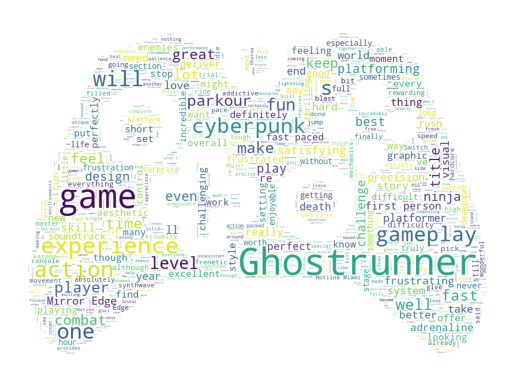

In [177]:
python_mask = np.array(PIL.Image.open('paad.png'))

wc = WordCloud(stopwords = STOPWORDS, mask = python_mask, 
               background_color='white', contour_color='grey', min_font_size= 1, max_words=100000).generate(' '.join(data_words['review']))
plt.imshow(wc)
plt.axis('off')
plt.show()

88Figure 2**. Word map showing intensity of particular words used in Opencritics Ghostrunner reviews. 

## Discussion

In summary, the analysis of Ghostrunner's reviews on the Opencritics portal indicates that they are, from a lexical perspective, positive. The overall polarity index of words appearing in the reviews suggests the use of words by reviewers that have connotations with positive emotions (mean VADER compound = 0.44). Additionally, the conducted difference test indicated that positive expressions appeared significantly more frequently in the reviews than negative ones. Therefore, the linguistic analysis of the reviews is consistent (in terms of tendency) with the overall ratings that the game received on the Opencritics portal (8/10), Metacritic (81/100), and gry-online.pl (7.4/10).